In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import re
import plotly as pl 
import matplotlib.pyplot as plt

In [2]:
file ="Resources/flavors_of_cacao.csv"
df_chocolate = pd.read_csv(file)
df_chocolate.head()

,Company,Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
#Changing column names
#columns_name = ['Company', 'Bean_Origin', 'REF', 'Review_Date', 'Cocoa_Percentage', 'Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin'] 
#df_chocolate.columns = columns_name
#df_chocolate

In [4]:
#Converting String Cocoa_Percent column into Integers
df_chocolate["Cocoa_Percent"] = df_chocolate["Cocoa_Percent"].str.replace('%', '')
df_chocolate['Cocoa_Percent'] = df_chocolate['Cocoa_Percent'].str.replace('.', '')
df_chocolate["Cocoa_Percent"]= df_chocolate["Cocoa_Percent"].astype(float)/100
df_chocolate["Cocoa_Percent"]

C:\Users\bjile\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


0       0.63
1       0.70
2       0.70
3       0.70
4       0.70
        ... 
1790    0.70
1791    0.65
1792    0.65
1793    0.62
1794    0.65
Name: Cocoa_Percent, Length: 1795, dtype: float64

In [5]:
df_chocolate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1795 non-null   object 
 1   Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                      1795 non-null   int64  
 3   Review_Date              1795 non-null   int64  
 4   Cocoa_Percent            1795 non-null   float64
 5   Company_Location         1795 non-null   object 
 6   Rating                   1795 non-null   float64
 7   Bean_Type                1794 non-null   object 
 8   Broad_Bean_Origin        1794 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


In [6]:
df_chocolate.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bean_Origin_or_Bar_Name,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795.0,NaN,NaN,NaN,1035.904735,552.886365,5.0,576.0,1069.0,1502.0,1952.0
Review_Date,1795.0,NaN,NaN,NaN,2012.325348,2.92721,2006.0,2010.0,2013.0,2015.0,2017.0
Cocoa_Percent,1795.0,NaN,NaN,NaN,0.741928,0.404268,0.42,0.7,0.7,0.75,7.35
Company_Location,1795,60,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1795.0,NaN,NaN,NaN,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0
Bean_Type,1794,41,,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Broad_Bean_Origin,1794,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_chocolate.isnull().sum()

Company                    0
Bean_Origin_or_Bar_Name    0
REF                        0
Review_Date                0
Cocoa_Percent              0
Company_Location           0
Rating                     0
Bean_Type                  1
Broad_Bean_Origin          1
dtype: int64

In [8]:
#Identifying the record with NULL value in BeanOrigin
df_chocolate[df_chocolate['Broad_Bean_Origin'].isnull() == True]

,Company,Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
1072,Mast Brothers,Madagascar,999,2012,0.72,U.S.A.,2.5,Trinitario,NaN


In [9]:
# Replace empty BB_origin
df_chocolate['Broad_Bean_Origin'] = df_chocolate['Broad_Bean_Origin'].fillna(df_chocolate['Bean_Origin_or_Bar_Name'])

In [10]:
# Determine the number of unique values in each column.
df_chocolate.nunique()

Company                     416
Bean_Origin_or_Bar_Name    1039
REF                         440
Review_Date                  12
Cocoa_Percent                45
Company_Location             60
Rating                       13
Bean_Type                    41
Broad_Bean_Origin           100
dtype: int64

In [11]:
# Drop null values
df_chocolate.dropna(axis=0, how='any', inplace=True)

In [12]:
df_chocolate['Bean_Type'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Matina                        3
EET                           3
Beniano                       3
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Amarru)              2
Amazon mix                    2
Nacional                      2
Criollo (Ocumare)             1
Criollo (Ocumare 67)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Forastero (Amelonado)         1
Foraster

In [13]:
#replace the values in the bean_type column
def replace_beans (bean_type):
    #order of criollo, trinitario, and forastero was decided by seeing the number of times it appears
    if 'Criollo' in bean_type:
        return 'Criollo'
    elif 'Trinitario' in bean_type:
        return 'Trinitario'
    elif 'Forastero' in bean_type:
        return 'Forastero'
    else:
        return bean_type
    
df_chocolate['Bean_Type'] = df_chocolate['Bean_Type'].map(lambda bean_type: replace_beans(bean_type))

In [14]:
df_chocolate['Bean_Type'].value_counts()

                     887
Trinitario           426
Criollo              225
Forastero            195
Blend                 41
Beniano                3
EET                    3
Matina                 3
Nacional (Arriba)      3
Nacional               2
Amazon mix             2
Amazon, ICS            2
CCN51                  1
Amazon                 1
Name: Bean_Type, dtype: int64

In [15]:
list(df_chocolate['Bean_Type'][0:5])

['\xa0', '\xa0', '\xa0', '\xa0', '\xa0']

In [16]:
# Replace the weird spaces with None (Symbolizes no data) 

def repl_space(x):
    if(x is "\xa0"):
        return "None"

# apply()        
df_chocolate['Bean_Type'] = df_chocolate['Bean_Type'].apply(repl_space)
df_chocolate.head()

,Company,Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,None,Peru


In [17]:
# Look at Broad Bean Origin value counts for binning
Broad_Bean_Origin_counts=df_chocolate['Broad_Bean_Origin'].value_counts()
Broad_Bean_Origin_counts


Venezuela                214
Ecuador                  193
Peru                     165
Madagascar               146
Dominican Republic       141
                        ... 
Nigeria                    1
Peru, Belize               1
Peru, Mad., Dom. Rep.      1
PNG, Vanuatu, Mad          1
Venezuela, Carribean       1
Name: Broad_Bean_Origin, Length: 99, dtype: int64

<AxesSubplot:ylabel='Density'>

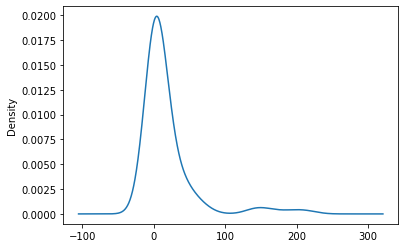

In [18]:
# Visualize the value counts of Broad Bean Origin
Broad_Bean_Origin_counts.plot.density()

In [19]:
# Look at Broad Bean Origin value counts for binning
Bean_Origin_counts=df_chocolate['Bean_Origin_or_Bar_Name'].value_counts()
Bean_Origin_counts

Madagascar                        57
Peru                              45
Ecuador                           42
Dominican Republic                37
Venezuela                         21
                                  ..
Conacado, #213, DR, -C             1
Sambirano Valley, #215, MR, MC     1
Chuao, #218, MR, MC                1
Chuao, #217, DR, MC                1
Brazil, Mitzi Blue                 1
Name: Bean_Origin_or_Bar_Name, Length: 1038, dtype: int64

In [20]:
# check any N/A values in  
df_chocolate['Bean_Origin_or_Bar_Name'].isnull().value_counts()

False    1794
Name: Bean_Origin_or_Bar_Name, dtype: int64

In [21]:
# Look at Broad Bean Origin value counts for binning
Company_counts=df_chocolate['Company'].value_counts()
Company_counts

Soma                 46
Bonnat               27
Fresco               26
Pralus               25
A. Morin             23
                     ..
Chocablog             1
Marigold's Finest     1
Chloe Chocolat        1
Chequessett           1
Ki' Xocolatl          1
Name: Company, Length: 416, dtype: int64

In [22]:
Cocoa_Percentage_counts=df_chocolate['Cocoa_Percent'].value_counts()
Cocoa_Percentage_counts

0.70    671
0.75    222
0.72    189
0.65     78
0.80     72
0.74     50
0.68     47
0.60     43
0.73     40
0.85     36
0.64     34
0.77     33
0.71     31
0.67     27
0.76     23
0.66     23
1.00     20
0.82     17
0.78     17
0.55     16
0.62     14
0.63     12
0.69     10
0.90      8
0.61      8
0.88      8
0.58      8
0.81      5
0.83      4
0.84      4
7.25      4
0.91      3
0.56      2
7.35      2
0.99      2
0.89      2
0.53      1
0.46      1
6.05      1
0.57      1
0.79      1
0.86      1
0.50      1
0.42      1
0.87      1
Name: Cocoa_Percent, dtype: int64

In [23]:
Review_Date_counts=df_chocolate['Review_Date'].value_counts()
Review_Date_counts

2015    285
2014    247
2016    219
2012    195
2013    184
2011    164
2009    123
2010    111
2008     93
2007     77
2006     72
2017     24
Name: Review_Date, dtype: int64

<AxesSubplot:ylabel='Density'>

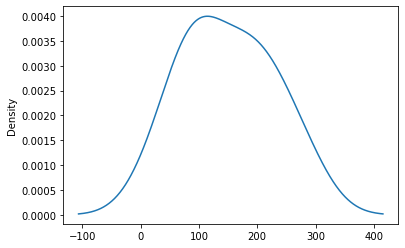

In [24]:
# Visualize the value counts of Broad Bean Origin
Review_Date_counts.plot.density()

In [25]:
# Determine which values to replace if counts are less than ...?
replace_Review_Date= list(Review_Date_counts[Review_Date_counts < 100].index)

# Replace in dataframe
for RD in replace_Review_Date:
    df_chocolate['Review_Date'] = df_chocolate['Review_Date'].replace(RD,"Other")
    
# Check to make sure binning was successful
df_chocolate['Review_Date'].value_counts()

2015     285
Other    266
2014     247
2016     219
2012     195
2013     184
2011     164
2009     123
2010     111
Name: Review_Date, dtype: int64

In [26]:
df_chocolate['Company'].sort_values().unique()

array(['A. Morin', 'AMMA', 'Acalli', 'Adi', 'Aequare (Gianduja)',
       'Ah Cacao', "Akesson's (Pralus)", 'Alain Ducasse', 'Alexandre',
       'Altus aka Cao Artisan', 'Amano', 'Amatller (Simon Coll)',
       'Amazona', 'Ambrosia', 'Amedei', 'Anahata', 'Animas', 'Ara',
       'Arete', 'Artisan du Chocolat', 'Artisan du Chocolat (Casa Luker)',
       'Askinosie', 'Bahen & Co.', 'Bakau', 'Bar Au Chocolat',
       "Baravelli's", 'Batch', 'Beau Cacao', 'Beehive', 'Belcolade',
       'Bellflower', 'Belyzium', 'Benoit Nihant', 'Bernachon',
       'Beschle (Felchlin)', 'Bisou', 'Bittersweet Origins',
       'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Bonnat', 'Bouga Cacao (Tulicorp)', 'Bowler Man',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mill', 'Bright',
       'Britarev', 'Bronx Grrl Chocolate', 'Burnt Fork Bend', 'C-Amaro',
       'Cacao Arabuco', 'Cacao Atlanta', 'Cacao Barry', 'Cacao Hunters',
       'Cacao Market', 'Cacao Prieto', 'Ca

In [27]:
#Check spelling for Company Location values.
df_chocolate['Company_Location'].sort_values().unique()

array(['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador',
       'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana',
       'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Niacragua',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

In [28]:
df_chocolate['Company_Location'] = df_chocolate['Company_Location'].str.replace('Domincan Republic', 'Dominican Republic')\
.str.replace('Eucador', 'Ecuador')\
.str.replace('Amsterdam','Netherlands')\
.str.replace('Niacragua', 'Nicaragua')\


df_chocolate['Company_Location'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Fiji', 'Finland', 'France', 'Germany', 'Ghana', 'Grenada',
       'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Russia', 'Sao Tome', 'Scotland', 'Singapore', 'South Africa',
       'South Korea', 'Spain', 'St. Lucia', 'Suriname', 'Sweden',
       'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam', 'Wales'],
      dtype=object)

In [29]:


## Text preparation (correction) function
def txt_prep(text):
    replacements = [
        ['\(', ','],['-', ','], ['/', ','], [' & ', ','], ['\)', ''], [' and ', ','],
        ['Dom Rep$|Dom Rep,|DR|Domin Rep|Dominican Rep$|Dominican Rep,|Domincan Republic', 'Dominican Republic,'],
        ['Mad,|Mad$', 'Madagascar,'],['PNG,|PNG$', 'Papua New Guinea,'],
        ['Guat,|Guat$', 'Guatemala,'], ['Ven,|Ven$|Venez,', 'Venezuela,'],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador,'],['Nic,|Nic$', 'Nicaragua,'],
        ['Cost Rica', 'Costa Rica'], ['Mex,|Mex$', 'Mexico,'],['Nic,|Nic$','Nicaragua'],
        ['Jam$|Jam,', 'Jamaica,'], ['Haw$|Haw,', 'Hawaii,'],
        ['Gre$|Gre,', 'Grenada,'], ['Tri$', 'Trinidad'], ['C Am', 'Central America'],
        ['S America', 'South America'], ['Central,', 'Central America,'],
        ['\\xa0', ' '],  [',$',''], ['\.',''], [',,',','], [',\s+',','], 
    ]
    for i, j in replacements:
        text = re.sub(i, j, str(text))
    return text



In [30]:
df_chocolate['Broad_Bean_Origin'].str.replace('.','').apply(txt_prep).unique()

C:\Users\bjile\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', ' ', 'Jamaica', 'Grenada',
       'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Congo',
       'Philippines', 'Malaysia', 'Dominican Republic,Bali',
       'Venezuela,Africa,Brasil,Peru,Mexico', 'Gabon', 'Ivory Coast',
       'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda', 'Martinique',
       'Sao Tome,Principe', 'Vanuatu', 'Australia', 'Liberia',
       'Ecuador,Costa Rica', 'West Africa', 'Hawaii', 'St Lucia',
       'Costa Rica,Venezuela', 'Peru,Madagascar', 'Venezuela,Trinidad',
       'Trinidad,Tobago', 'Venezuela,Trinidad,Ecuador',
       'South America,Africa', 'India',
       'Africa,Carribean,Central America', 'Tobago',
       'Venezuela,Indonesia,Ecuador', 'Peru,Ecuador,Ven

In [31]:
df_chocolate['Broad_Bean_Origin']= df_chocolate['Broad_Bean_Origin'].str.replace('.','').apply(txt_prep)

C:\Users\bjile\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [32]:
def bin_ratings(rating):
    if rating == 5.75: return 1
    if rating == 5.50: return 1
    if rating == 5.25: return 1
    if rating == 5.00: return 1
    
    if rating == 4.75: return 1
    if rating == 4.50: return 1
    if rating == 4.25: return 1
    if rating == 4.00: return 1
    
    if rating == 3.75: return 0
    if rating == 3.50: return 0
    if rating == 3.25: return 0
    if rating == 3.00: return 0

    if rating == 2.75: return 0
    if rating == 2.50: return 0
    if rating == 2.25: return 0
    if rating == 2.00: return 0
    
    if rating == 1.75: return 0
    if rating == 1.50: return 0
    if rating == 1.25: return 0
    if rating == 1.00: return 0
    
    #print( f"error: rating={rating} type={type(rating)}" )
    return "2"

In [33]:
df_chocolate['Rating'] = df_chocolate['Rating'].apply(bin_ratings)
df_chocolate['Rating']

0       0
1       0
2       0
3       0
4       0
       ..
1790    0
1791    0
1792    0
1793    0
1794    0
Name: Rating, Length: 1794, dtype: int64

In [34]:
def to_string(value):
    other = f"_{value}_"
    return other

In [35]:
def reduce_count_vals(df, colname, threshold):
    counts = df[colname].value_counts()
    replace_list = list(counts[counts < threshold].index)

    # Replace in dataframe
    for item in replace_list:
       df[colname] = df[colname].replace(item,"Other")

In [36]:
df_chocolate['Review_Date']= df_chocolate['Review_Date'].apply(to_string)
reduce_count_vals(df_chocolate, 'Review_Date', 100)

In [37]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_chocolate= df_chocolate.drop(columns=["Company", "REF","Bean_Origin_or_Bar_Name"], axis=1)
df_chocolate.head()

,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,_2016_,0.63,France,0,None,Sao Tome
1,_2015_,0.70,France,0,None,Togo
2,_2015_,0.70,France,0,None,Togo
3,_2015_,0.70,France,0,None,Togo
4,_2015_,0.70,France,0,None,Peru


In [38]:
# Generate our categorical variable lists
chocolate_cat = df_chocolate.dtypes[df_chocolate.dtypes == 'object'].index.tolist()
chocolate_cat

['Review_Date', 'Company_Location', 'Bean_Type', 'Broad_Bean_Origin']

In [39]:


# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_chocolate[chocolate_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(chocolate_cat)
encode_df.head()



,Review_Date__2009_,Review_Date__2010_,Review_Date__2011_,Review_Date__2012_,Review_Date__2013_,Review_Date__2014_,Review_Date__2015_,Review_Date__2016_,Review_Date__Other_,Company_Location_Argentina,...,"Broad_Bean_Origin_Venezuela,Dominican Republic","Broad_Bean_Origin_Venezuela,Ecuador,Peru,Nicaragua","Broad_Bean_Origin_Venezuela,Ghana","Broad_Bean_Origin_Venezuela,Indonesia,Ecuador","Broad_Bean_Origin_Venezuela,Java","Broad_Bean_Origin_Venezuela,Trinidad","Broad_Bean_Origin_Venezuela,Trinidad,Ecuador","Broad_Bean_Origin_Venezuela,Trinidad,Madagascar",Broad_Bean_Origin_Vietnam,Broad_Bean_Origin_West Africa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Merge one-hot encoded features and drop the originals
df_chocolate = df_chocolate.merge(encode_df, left_index=True, right_index=True).drop(chocolate_cat, 1)
df_chocolate.head()

C:\Users\bjile\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Cocoa_Percent,Rating,Review_Date__2009_,Review_Date__2010_,Review_Date__2011_,Review_Date__2012_,Review_Date__2013_,Review_Date__2014_,Review_Date__2015_,Review_Date__2016_,...,"Broad_Bean_Origin_Venezuela,Dominican Republic","Broad_Bean_Origin_Venezuela,Ecuador,Peru,Nicaragua","Broad_Bean_Origin_Venezuela,Ghana","Broad_Bean_Origin_Venezuela,Indonesia,Ecuador","Broad_Bean_Origin_Venezuela,Java","Broad_Bean_Origin_Venezuela,Trinidad","Broad_Bean_Origin_Venezuela,Trinidad,Ecuador","Broad_Bean_Origin_Venezuela,Trinidad,Madagascar",Broad_Bean_Origin_Vietnam,Broad_Bean_Origin_West Africa
0,0.63,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.70,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.70,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.70,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.70,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Split our preprocessed data into our features and target arrays
y = df_chocolate["Rating"].values
X = df_chocolate.drop(["Rating"],1).values 

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\bjile\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
len(X_train_scaled[0])

165

In [44]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  256
hidden_nodes_layer2 = 128
hidden_nodes_layer3 = 64
hidden_nodes_layer4 = 32
hidden_nodes_layer5 = 16
hidden_nodes_layer6 = 8
hidden_nodes_layer7 = 4


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, input_dim = number_input_features, activation = 'relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation = 'relu'))

# other hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer3, activation = 'relu'))
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer4, activation = 'relu'))
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer5, activation = 'relu'))
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer6, activation = 'relu'))
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer7, activation = 'relu'))


# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               42496     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 3

In [45]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [46]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [47]:
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [48]:
# Train the model
nn.fit(X_train_scaled, y_train, epochs = 100, callbacks=[cp_callback])

Epoch 1/100
42/42 [==============================] - 1s 2ms/step - loss: 0.6874 - accuracy: 0.7894
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.9479
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.9479
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9479
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9479

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 0.1600 - accuracy: 0.9479
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9479
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9479
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9494
Epoch 10/100
42/42 [==============================]

42/42 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9725
Epoch 75/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9732

Epoch 00075: saving model to checkpoints\weights.75.hdf5
Epoch 76/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9717
Epoch 77/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9732
Epoch 78/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9732
Epoch 79/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9717
Epoch 80/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9717

Epoch 00080: saving model to checkpoints\weights.80.hdf5
Epoch 81/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9710
Epoch 82/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.97

In [49]:


# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



15/15 - 0s - loss: 1.3921 - accuracy: 0.9176
Loss: 1.3920620679855347, Accuracy: 0.9175946712493896


In [50]:
# FIXME: Do we really need to save these models? (And should the name really be AlphabetSoupCharity?)
nn.save("AlphabetSoupCharity.h5")